In [3]:
import pandas as pd
import numpy as np

# Δημιουργούμε ψεύτικα δεδομένα για 100 γονίδια
np.random.seed(42)
gene_ids = [f"GENE_{i:04d}" for i in range(1, 101)]
gene_names = [f"GeneName_{i}" for i in range(1, 101)]
tissue1 = np.random.normal(loc=50, scale=10, size=100)
tissue2 = np.random.normal(loc=60, scale=12, size=100)
tissue3 = np.random.normal(loc=70, scale=15, size=100)

df = pd.DataFrame({
    "gene_id": gene_ids,
    "gene_name": gene_names,
    "tissue1_expr": tissue1,
    "tissue2_expr": tissue2,
    "tissue3_expr": tissue3
})

# Αποθήκευση ως genes.txt
df.to_csv("genes.txt", sep="\t", index=False)
print("Το αρχείο genes.txt δημιουργήθηκε με επιτυχία.")


Το αρχείο genes.txt δημιουργήθηκε με επιτυχία.


In [4]:
#Ερώτημα 1: Ανάγνωση δεδομένων
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Διαβάζουμε τα δεδομένα
genes = pd.read_csv("genes.txt", sep="\t")
genes.head()


,gene_id,gene_name,tissue1_expr,tissue2_expr,tissue3_expr
0,GENE_0001,GeneName_1,54.967142,43.015551,75.366810
1,GENE_0002,GeneName_2,48.617357,54.952256,78.411768
2,GENE_0003,GeneName_3,56.476885,55.887426,86.245769
3,GENE_0004,GeneName_4,65.230299,50.372673,85.807031
4,GENE_0005,GeneName_5,47.658466,58.064571,49.334959


In [5]:
#Ερώτημα 2: Περιγραφικά στατιστικά
# Στατιστικά για τις στήλες έκφρασης
genes[["tissue1_expr", "tissue2_expr", "tissue3_expr"]].describe()

,tissue1_expr,tissue2_expr,tissue3_expr
count,100.000000,100.000000,100.000000
mean,48.961535,60.267655,70.973444
std,9.081684,11.444028,16.264243
min,23.802549,36.974745,21.380990
25%,43.990943,50.332074,60.168347
50%,48.730437,61.009286,71.465436
75%,54.059521,66.458045,80.566562
max,68.522782,92.642030,127.790972


In [6]:
#Ερώτημα 3: Ποιό γονίδιο έχει τη μεγαλύτερη έκφραση (μέσος όρος)

genes["mean_expr"] = genes[["tissue1_expr", "tissue2_expr", "tissue3_expr"]].mean(axis=1)
highest = genes.loc[genes["mean_expr"].idxmax()]
print("Γονίδιο με τη μεγαλύτερη έκφραση:\n", highest)

Γονίδιο με τη μεγαλύτερη έκφραση:
 gene_id           GENE_0010
gene_name       GeneName_10
tissue1_expr        55.4256
tissue2_expr      59.106649
tissue3_expr     127.790972
mean_expr         80.774407
Name: 9, dtype: object


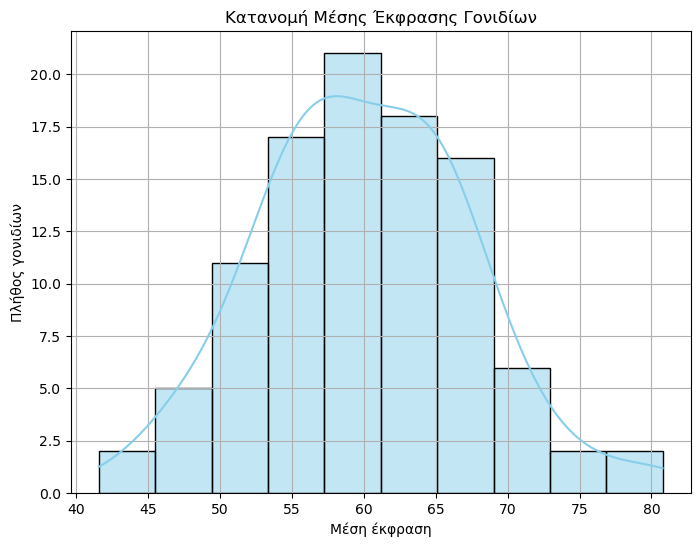

In [7]:
#Ερώτημα 4: Ιστόγραμμα έκφρασης
plt.figure(figsize=(8,6))
sns.histplot(genes["mean_expr"], kde=True, color="skyblue")
plt.title("Κατανομή Μέσης Έκφρασης Γονιδίων")
plt.xlabel("Μέση έκφραση")
plt.ylabel("Πλήθος γονιδίων")
plt.grid()
plt.show()

In [8]:
#Ερώτημα 5: Κανονικοποίηση (Z-score)
from scipy.stats import zscore

genes["zscore_expr"] = zscore(genes["mean_expr"])
genes[["gene_id", "mean_expr", "zscore_expr"]].head()

,gene_id,mean_expr,zscore_expr
0,GENE_0001,57.783168,-0.310409
1,GENE_0002,60.660460,0.080567
2,GENE_0003,66.203360,0.833755
3,GENE_0004,67.136667,0.960575
4,GENE_0005,51.685999,-1.138912


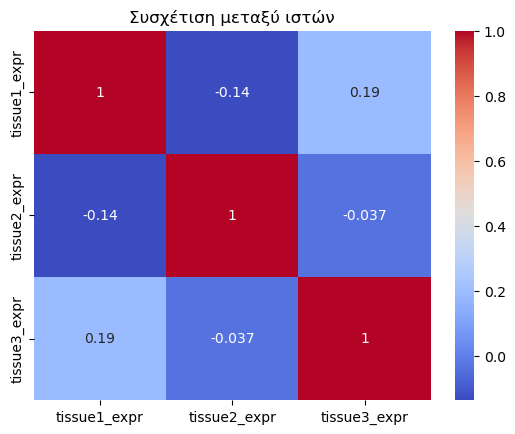

In [9]:
#Ερώτημα 6: Correlation μεταξύ ιστών
corr = genes[["tissue1_expr", "tissue2_expr", "tissue3_expr"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Συσχέτιση μεταξύ ιστών")
plt.show()

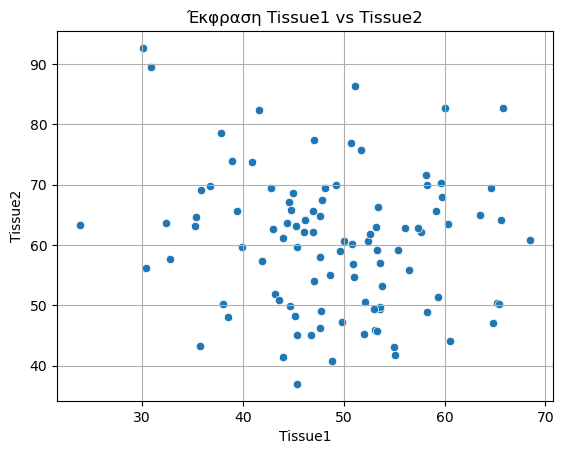

In [10]:
#Ερώτημα 7: Scatterplot Tissue1 vs Tissue2
sns.scatterplot(data=genes, x="tissue1_expr", y="tissue2_expr")
plt.title("Έκφραση Tissue1 vs Tissue2")
plt.xlabel("Tissue1")
plt.ylabel("Tissue2")
plt.grid()
plt.show()